# A playground notebook to learn various community algorithms.

This is just a place where I experiment with various community algorithms.

In [95]:
import igraph as ig
import cairocffi
import pandas as pd

## Using our perimenopause graph as a learning example.

In [101]:
filename = 'graph_weights_perimeno2_npt.csv'
data = pd.read_csv(filename)
data.head()

,mood_swings,spotting,constipation,uti,joint_pain,painful_intercourse,headaches,anxiety,fatigue,hot_flashes,...,irregular_beat,cramps,odor,depression,chills,vomiting,vertigo,yeast_infection,breast_swelling,breast_pain
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.415647,0.0,0.0,...,0.0,0.000000,0,0.53317,0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,1.253713,0,0.00000,0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0,0.00000,0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0,0.00000,0,0.0,0.0,1.361436,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.0,...,0.0,0.000000,0,0.00000,0,0.0,0.0,0.000000,0.0,0.0


The data is essentially an adjacency matix as exported from R after the IsingFit has been run and a network analysis has been performed.

The current version of walktrap that we have does not work with negative edges. Hence we will go ahead and remove them.

In [102]:
# Shortens the name of the vertices so it is easy to see what is going on.
def shorten(names):
    nm = []
    for n in names:
        nm.append(n[0:7])
        
    return nm

In [103]:
def fixer(n):
    if n < 0:
        return 0
    return n

data = data.applymap(fixer)

# Creating a graph with vertices named after the symptoms.
g = ig.Graph.Weighted_Adjacency(data.to_numpy())

# Set the vertex names to the symptoms.
g.vs['name'] = data.columns.values
nm = shorten(g.vs['name'])

style = {
    'edge_label' : g.es['weight'],
    'vertex_label' : nm
}

#ig.plot(g, **style)

Start the clustering using walktrap.

In [104]:
wtrap = g.community_walktrap(weights=g.es["weight"], steps = 4)

In [105]:
clust=wtrap.as_clustering()

In [106]:
print(clust)

Clustering with 42 elements and 15 clusters
[ 0] mood_swings, anxiety, fatigue, insomnia, brain_fog, memory_lapse,
     depression
[ 1] spotting, diarrhea, nausea, cramps, vomiting
[ 2] constipation, itchy_skin, dry_skin, hair_loss, dry_eyes, brittle_nails,
     facial_hair, heartburn
[ 3] uti, yeast_infection
[ 4] joint_pain, muscle_tension, tingling_extremeties
[ 5] painful_intercourse, sex_drive, vaginal_dryness
[ 6] headaches
[ 7] hot_flashes, night_sweats
[ 8] bloating, breast_swelling, breast_pain
[ 9] allergies
[10] incontinence
[11] dizzy, irregular_beat, vertigo
[12] ringing_ears
[13] odor
[14] chills


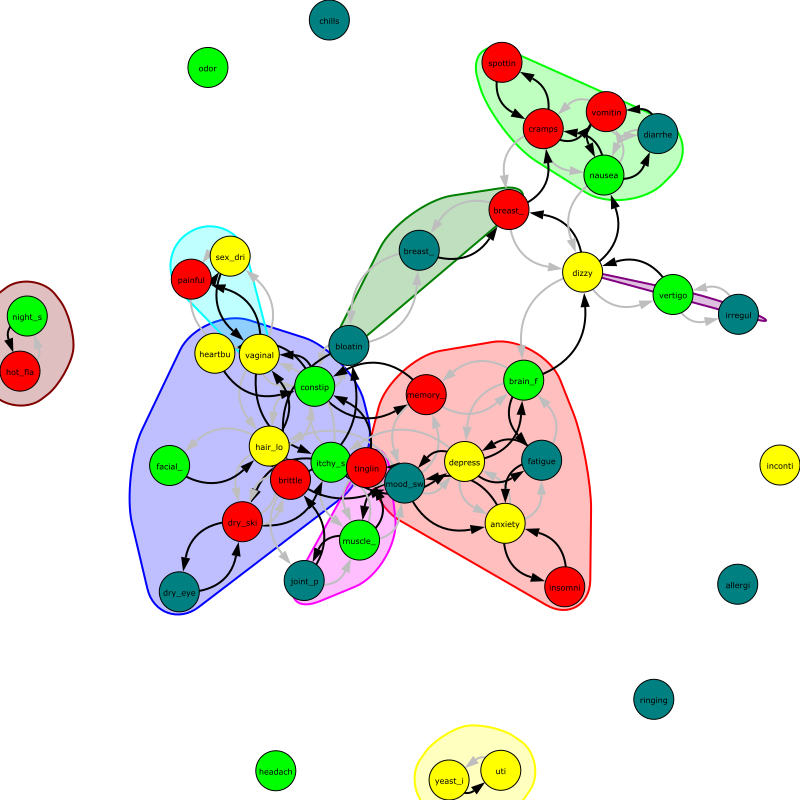

In [107]:
style = {
    'vertex_label' : nm,
    'vertex_label_size': 8,  # Define the text size for vertex labels
    "edge_width": 2, # You can adjust the edge width as well
    "vertex_size":40,
    "vertex_color":['teal', 'red', 'green', 'yellow'],
    "edge_color":['black', 'grey']
    
}

# Specify the size of the plot by adjusting the bbox parameter
bbox = (0, 0, 800, 800)  # Adjust the coordinates as needed to set the plot size

ig.plot(clust, mark_groups=True, **style, bbox=bbox)

### Node degree, closeness, betweenness, strength (what character these nodes have!)

In [108]:
import igraph as ig
import pandas as pd

# Create a list of node labels (assuming 4 nodes)
node_labels = nm

# Creating a graph with vertices named after the symptoms and labels
G = ig.Graph.Weighted_Adjacency(data.to_numpy(), mode=ig.ADJ_UPPER, attr='weight')
G.vs['label'] = node_labels  # Assign labels to nodes

degree_centrality = G.degree()
betweenness_centrality = G.betweenness()
closeness_centrality = G.closeness()
strength_centrality = G.strength(weights='weight')  # 'weight' refers to edge weights

# Create a DataFrame to store centrality values and node labels
centrality_df = pd.DataFrame({
    'Node Label': node_labels,
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Strength Centrality': strength_centrality
})

# Sort the DataFrame by each centrality measure and get the top five nodes
top_degree_nodes = centrality_df.nlargest(5, 'Degree Centrality')
top_betweenness_nodes = centrality_df.nlargest(5, 'Betweenness Centrality')
top_closeness_nodes = centrality_df.nlargest(5, 'Closeness Centrality')
top_strength_nodes = centrality_df.nlargest(5, 'Strength Centrality')

# Print the top nodes for each centrality measure
print("Top 5 nodes by Degree Centrality:")
print(top_degree_nodes)

print("\nTop 5 nodes by Betweenness Centrality:")
print(top_betweenness_nodes)

print("\nTop 5 nodes by Closeness Centrality:")
print(top_closeness_nodes)

print("\nTop 5 nodes by Strength Centrality:")
print(top_strength_nodes)


Top 5 nodes by Degree Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
0     mood_sw                  6               70.021429   
2     constip                  6               96.447619   
19    hair_lo                  6               67.785714   
15    vaginal                  5               62.792857   
35    depress                  5               82.350000   

    Closeness Centrality  Strength Centrality  
0               0.360465             1.510876  
2               0.373494             0.984728  
19              0.348315             1.270676  
15              0.329787             2.876835  
35              0.369048             2.561596  

Top 5 nodes by Betweenness Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
27      dizzy                  4              145.516667   
18    brain_f                  4              138.359524   
2     constip                  6               96.447619   
35    depress                  5     

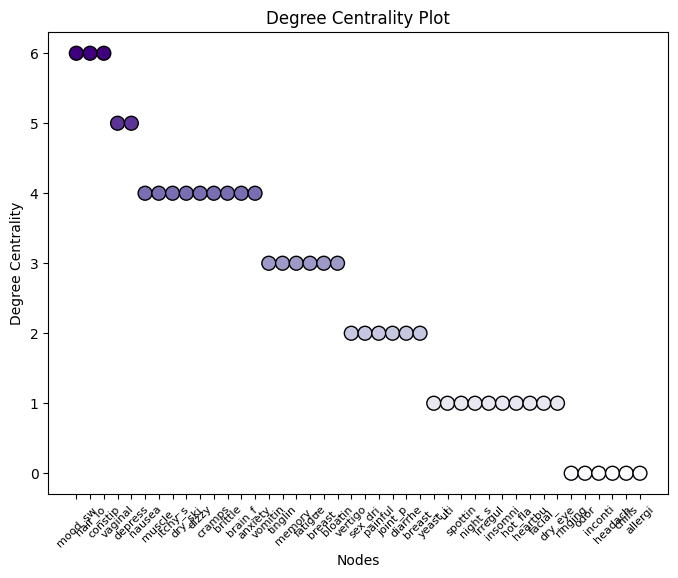

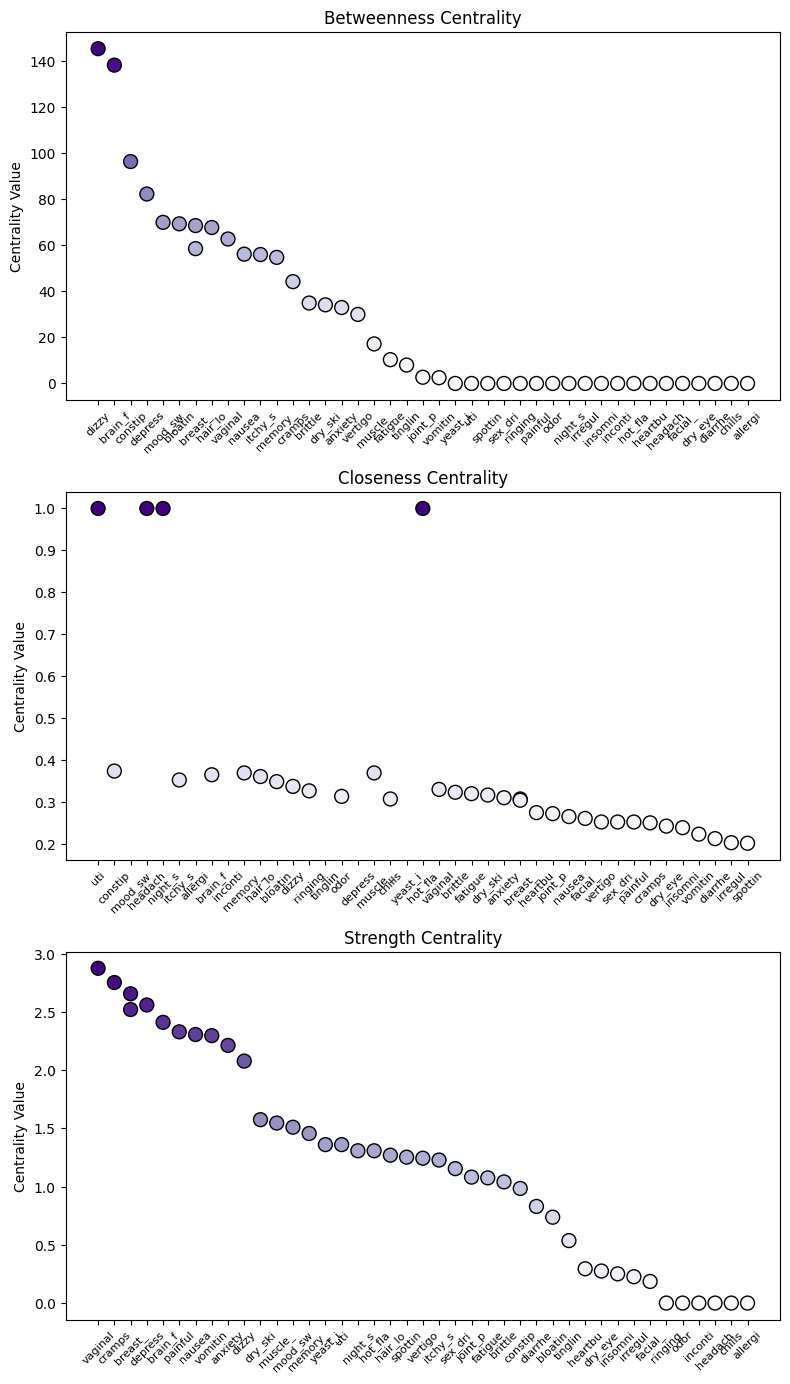

In [109]:
import igraph as ig
import matplotlib.pyplot as plt

# Create a list of node labels (assuming 4 nodes)
node_labels = nm

# Creating a graph with vertices named after the symptoms and labels
G = ig.Graph.Weighted_Adjacency(data.to_numpy(), mode=ig.ADJ_UPPER, attr='weight')
G.vs['label'] = node_labels  # Assign labels to nodes

degree_centrality = G.degree()

# Sort nodes by degree centrality (high to low)
degree_sorted_nodes = [x for _, x in sorted(zip(degree_centrality, node_labels), reverse=True)]
degree_centrality.sort(reverse=True)

# Extract nodes and centrality values
nodes = list(range(len(degree_centrality)))
centrality_values = degree_centrality

# Create a scatter plot for Degree Centrality
plt.figure(figsize=(8, 6))
plt.scatter(nodes, centrality_values, c=centrality_values, cmap='Purples', edgecolors='k', s=100)

plt.title('Degree Centrality Plot')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')

# Set the x-axis label font size and rotation using degree_sorted_nodes
plt.xticks(nodes, degree_sorted_nodes, rotation=45, fontsize=8)  # Assign labels and adjust 'fontsize'

# Calculate Betweenness Centrality
betweenness_centrality = G.betweenness()

# Calculate Closeness Centrality
closeness_centrality = G.closeness()

# Calculate Strength Centrality (assuming weighted graph)
strength_centrality = G.strength(weights='weight')  # 'weight' refers to edge weights

# Sort nodes by centrality for each measure (high to low)
betweenness_sorted_nodes = [x for _, x in sorted(zip(betweenness_centrality, node_labels), reverse=True)]
closeness_sorted_nodes = [x for _, x in sorted(zip(closeness_centrality, node_labels), reverse=True)]
strength_sorted_nodes = [x for _, x in sorted(zip(strength_centrality, node_labels), reverse=True)]

# Sort centrality values accordingly
betweenness_centrality.sort(reverse=True)
closeness_centrality.sort(reverse=True)
strength_centrality.sort(reverse=True)

# Create a figure with larger vertically aligned subplots
plt.figure(figsize=(8, 18))

# Create a scatter plot for Betweenness Centrality
plt.subplot(411)
plt.scatter(betweenness_sorted_nodes, betweenness_centrality, c=betweenness_centrality, cmap='Purples', edgecolors='k', s=100)
plt.title('Betweenness Centrality')
plt.ylabel('Centrality Value')

# Set the x-axis label font size and rotation using betweenness_sorted_nodes
plt.xticks(rotation=45, fontsize=8)

# Create a scatter plot for Closeness Centrality
plt.subplot(412)
plt.scatter(closeness_sorted_nodes, closeness_centrality, c=closeness_centrality, cmap='Purples', edgecolors='k', s=100)
plt.title('Closeness Centrality')
plt.ylabel('Centrality Value')

# Set the x-axis label font size and rotation using closeness_sorted_nodes
plt.xticks(rotation=45, fontsize=8)

# Create a scatter plot for Strength Centrality
plt.subplot(413)
plt.scatter(strength_sorted_nodes, strength_centrality, c=strength_centrality, cmap='Purples', edgecolors='k', s=100)
plt.title('Strength Centrality')
plt.ylabel('Centrality Value')

# Set the x-axis label font size and rotation using strength_sorted_nodes
plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


## Premenopausal, Including Regular and Irregular

Clustering with 42 elements and 18 clusters
[ 0] dryeyes, dryskin, chills, nails, hairloss, itchy
[ 1] spotting, bloat, breastp, swollen, cramps
[ 2] headfog, memory, anxiety, fatigue, depression, moods
[ 3] nausea, vertigo, headaches, diarrhea, dizzy, vomiting
[ 4] insomnia
[ 5] tight, tingle, arthritis
[ 6] heart
[ 7] tinitis
[ 8] incontinence
[ 9] libido, drynessv, pain sex
[10] heartburn
[11] constipation
[12] facial_hair
[13] allergies
[14] ovpain, ovulation
[15] odor
[16] uti
[17] yeast_infection


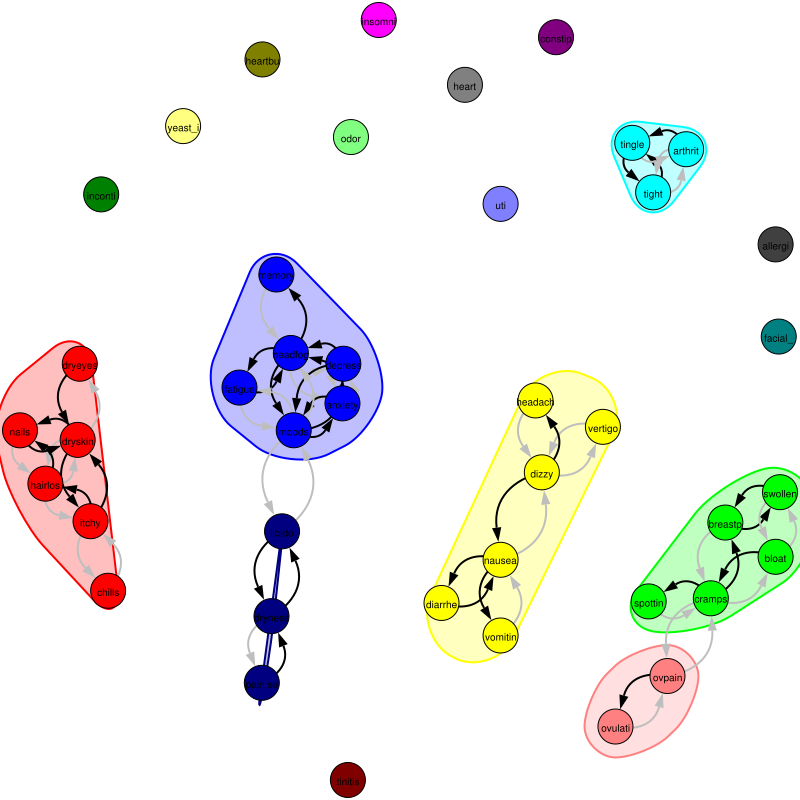

In [125]:
filename = 'graph_weights_allpremeno_labelfix_npt.csv'


data = pd.read_csv(filename)
data.head()

data = data.applymap(fixer)

# Creating a graph with vertices named after the symptoms.
g = ig.Graph.Weighted_Adjacency(data.to_numpy())

# Set the vertex names to the symptoms.
g.vs['name'] = data.columns.values

wtrap = g.community_walktrap(weights=g.es["weight"], steps = 4)

clust=wtrap.as_clustering()

print(clust)

nm = shorten(g.vs['name'])

style = {
    'vertex_label' : nm,
    'vertex_label_size': 10,  # Define the text size for vertex labels
    "edge_width": 2, # You can adjust the edge width as well
    "vertex_size":35,
    #"vertex_color":['blue', 'red', 'green', 'yellow'],
    "edge_color":['black', 'grey']
    
}

# Specify the size of the plot by adjusting the bbox parameter
bbox = (0, 0, 800, 800)  # Adjust the coordinates as needed to set the plot size


ig.plot(clust, mark_groups=True, **style, bbox=bbox)




In [127]:
import igraph as ig
import pandas as pd

# Create a list of node labels (assuming 4 nodes)
node_labels = nm

# Creating a graph with vertices named after the symptoms and labels
G = ig.Graph.Weighted_Adjacency(data.to_numpy(), mode=ig.ADJ_UPPER, attr='weight')
G.vs['label'] = node_labels  # Assign labels to nodes

degree_centrality = G.degree()
betweenness_centrality = G.betweenness()
closeness_centrality = G.closeness()
strength_centrality = G.strength(weights='weight')  # 'weight' refers to edge weights

# Create a DataFrame to store centrality values and node labels
centrality_df = pd.DataFrame({
    'Node Label': node_labels,
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Strength Centrality': strength_centrality
})

# Sort the DataFrame by each centrality measure and get the top five nodes
top_degree_nodes = centrality_df.nlargest(5, 'Degree Centrality')
top_betweenness_nodes = centrality_df.nlargest(5, 'Betweenness Centrality')
top_closeness_nodes = centrality_df.nlargest(5, 'Closeness Centrality')
top_strength_nodes = centrality_df.nlargest(5, 'Strength Centrality')

# Print the top nodes for each centrality measure
#print("Top 5 nodes by Degree Centrality:")
rint(top_degree_nodes)

#print("\nTop 5 nodes by Betweenness Centrality:")
#print(top_betweenness_nodes)

#print("\nTop 5 nodes by Closeness Centrality:")
#print(top_closeness_nodes)

print("\nTop 5 nodes by Strength Centrality:")
print(top_strength_nodes)


Top 5 nodes by Degree Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
2     headfog                  5                     8.0   
25      moods                  5                    16.0   
5     dryskin                  4                     5.0   
29     cramps                  4                    11.5   
4      nausea                  3                     7.0   

    Closeness Centrality  Strength Centrality  
2               0.571429             1.607263  
25              0.666667             1.271560  
5               0.833333             1.785181  
29              0.750000             1.011660  
4               0.714286             1.594822  

Top 5 nodes by Strength Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
5     dryskin                  4                     5.0   
35     ovpain                  2                     5.0   
13    swollen                  2                     0.5   
2     headfog                  5        

### regular cyclers

Clustering with 42 elements and 29 clusters
[ 0] dry_eyes, dry_skin, sex_drive, facial_hair, itchy_skin
[ 1] spotting
[ 2] brain_fog, memory_lapse, fatigue, irregular_beat
[ 3] nausea, vertigo, dizzy
[ 4] anxiety
[ 5] bloating
[ 6] chills
[ 7] breast_pain, breast_swelling
[ 8] depression
[ 9] insomnia
[10] headaches
[11] muscle_tension, joint_pain
[12] tingling_extremeties
[13] brittle_nails
[14] diarrhea
[15] ringing_ears
[16] incontinence
[17] mood_swings
[18] heartburn
[19] constipation
[20] cramps
[21] allergies
[22] hair_loss
[23] vaginal_dryness
[24] ovulation_pain, uti, yeast_infection
[25] ovulation
[26] odor
[27] painful_intercourse
[28] vomiting


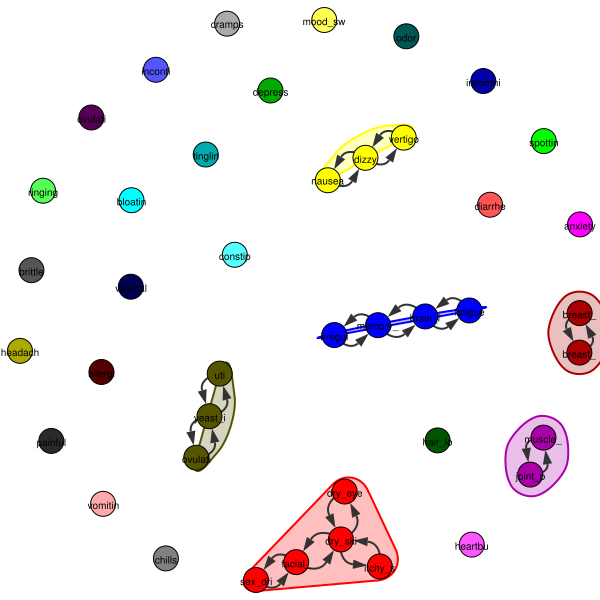

In [87]:
filename = 'graph_weights_regularpremeno_npt.csv'


data = pd.read_csv(filename)
data.head()

data = data.applymap(fixer)

# Creating a graph with vertices named after the symptoms.
g = ig.Graph.Weighted_Adjacency(data.to_numpy())

# Set the vertex names to the symptoms.
g.vs['name'] = data.columns.values

wtrap = g.community_walktrap(weights=g.es["weight"], steps = 4)

clust=wtrap.as_clustering()

print(clust)

nm = shorten(g.vs['name'])

style = {
    'vertex_label' : nm,
    'vertex_label_size': 10,  # Define the text size for vertex labels
    "edge_width": 2, # You can adjust the edge width as well
    "vertex_size":25
   
}

ig.plot(clust, mark_groups=True, **style)

In [89]:
import igraph as ig
import pandas as pd

# Create a list of node labels (assuming 4 nodes)
node_labels = nm

# Creating a graph with vertices named after the symptoms and labels
G = ig.Graph.Weighted_Adjacency(data.to_numpy(), mode=ig.ADJ_UPPER, attr='weight')
G.vs['label'] = node_labels  # Assign labels to nodes

degree_centrality = G.degree()
betweenness_centrality = G.betweenness()
closeness_centrality = G.closeness()
strength_centrality = G.strength(weights='weight')  # 'weight' refers to edge weights

# Create a DataFrame to store centrality values and node labels
centrality_df = pd.DataFrame({
    'Node Label': node_labels,
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Strength Centrality': strength_centrality
})

# Sort the DataFrame by each centrality measure and get the top five nodes
top_degree_nodes = centrality_df.nlargest(5, 'Degree Centrality')
top_betweenness_nodes = centrality_df.nlargest(5, 'Betweenness Centrality')
top_closeness_nodes = centrality_df.nlargest(5, 'Closeness Centrality')
top_strength_nodes = centrality_df.nlargest(5, 'Strength Centrality')

# Print the top nodes for each centrality measure
print("Top 5 nodes by Degree Centrality:")
print(top_degree_nodes)

print("\nTop 5 nodes by Betweenness Centrality:")
print(top_betweenness_nodes)

print("\nTop 5 nodes by Closeness Centrality:")
print(top_closeness_nodes)

print("\nTop 5 nodes by Strength Centrality:")
print(top_strength_nodes)


Top 5 nodes by Degree Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
5     dry_ski                  3                     5.0   
2     brain_f                  2                     2.0   
3     memory_                  2                     2.0   
28    facial_                  2                     3.0   
30      dizzy                  2                     1.0   

    Closeness Centrality  Strength Centrality  
5               0.800000             1.090862  
2               0.750000             1.108613  
3               0.750000             1.125431  
28              0.666667             0.662517  
30              1.000000             1.328809  

Top 5 nodes by Betweenness Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
5     dry_ski                  3                     5.0   
28    facial_                  2                     3.0   
2     brain_f                  2                     2.0   
3     memory_                  2     

### Irregular Cyclers

Clustering with 42 elements and 22 clusters
[ 0] dry_eyes
[ 1] spotting
[ 2] brain_fog, memory_lapse, anxiety, fatigue, depression, insomnia,
     mood_swings
[ 3] nausea
[ 4] dry_skin, brittle_nails, hair_loss, itchy_skin
[ 5] vertigo, headaches, muscle_tension, tingling_extremeties, joint_pain,
     dizzy
[ 6] bloating, breast_pain, breast_swelling, cramps
[ 7] chills
[ 8] irregular_beat
[ 9] diarrhea
[10] ringing_ears
[11] incontinence
[12] sex_drive, vaginal_dryness, painful_intercourse
[13] heartburn
[14] constipation
[15] facial_hair
[16] allergies
[17] ovulation_pain, ovulation
[18] odor
[19] uti
[20] yeast_infection
[21] vomiting


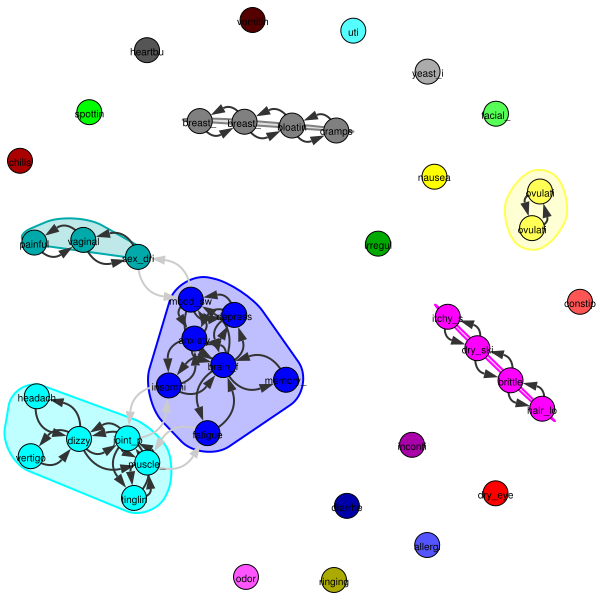

In [90]:
filename = 'graph_weights_irregularpremeno_npt.csv'


data = pd.read_csv(filename)
data.head()

data = data.applymap(fixer)

# Creating a graph with vertices named after the symptoms.
g = ig.Graph.Weighted_Adjacency(data.to_numpy())

# Set the vertex names to the symptoms.
g.vs['name'] = data.columns.values

wtrap = g.community_walktrap(weights=g.es["weight"], steps = 4)

clust=wtrap.as_clustering()

print(clust)

nm = shorten(g.vs['name'])

style = {
    'vertex_label' : nm,
    'vertex_label_size': 10,  # Define the text size for vertex labels
    "edge_width": 2, # You can adjust the edge width as well
    "vertex_size":25
   
}

ig.plot(clust, mark_groups=True, **style)

In [91]:
import igraph as ig
import pandas as pd

# Create a list of node labels (assuming 4 nodes)
node_labels = nm

# Creating a graph with vertices named after the symptoms and labels
G = ig.Graph.Weighted_Adjacency(data.to_numpy(), mode=ig.ADJ_UPPER, attr='weight')
G.vs['label'] = node_labels  # Assign labels to nodes

degree_centrality = G.degree()
betweenness_centrality = G.betweenness()
closeness_centrality = G.closeness()
strength_centrality = G.strength(weights='weight')  # 'weight' refers to edge weights

# Create a DataFrame to store centrality values and node labels
centrality_df = pd.DataFrame({
    'Node Label': node_labels,
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Strength Centrality': strength_centrality
})

# Sort the DataFrame by each centrality measure and get the top five nodes
top_degree_nodes = centrality_df.nlargest(5, 'Degree Centrality')
top_betweenness_nodes = centrality_df.nlargest(5, 'Betweenness Centrality')
top_closeness_nodes = centrality_df.nlargest(5, 'Closeness Centrality')
top_strength_nodes = centrality_df.nlargest(5, 'Strength Centrality')

# Print the top nodes for each centrality measure
print("Top 5 nodes by Degree Centrality:")
print(top_degree_nodes)

print("\nTop 5 nodes by Betweenness Centrality:")
print(top_betweenness_nodes)

print("\nTop 5 nodes by Closeness Centrality:")
print(top_closeness_nodes)

print("\nTop 5 nodes by Strength Centrality:")
print(top_strength_nodes)


Top 5 nodes by Degree Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
2     brain_f                  6               44.833333   
7     anxiety                  4               11.666667   
16    muscle_                  4               17.166667   
21    joint_p                  4               28.333333   
25    mood_sw                  4               36.000000   

    Closeness Centrality  Strength Centrality  
2               0.454545             1.587002  
7               0.416667             1.092800  
16              0.384615             1.284051  
21              0.394737             1.492729  
25              0.384615             1.240063  

Top 5 nodes by Betweenness Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
2     brain_f                  6               44.833333   
25    mood_sw                  4               36.000000   
14    insomni                  3               29.833333   
21    joint_p                  4     

## Menopause (Looks Terrible!)

Clustering with 41 elements and 8 clusters
[0] anxiety, fatigue, mood_swings, insomnia, brain_fog, memory_lapse,
    depression
[1] vaginal_dryness, sex_drive, painful_intercourse
[2] night_sweats, hot_flashes, chills
[3] headaches, dizzy, irregular_beat, heartburn, vertigo
[4] bloating, constipation, itchy_skin, joint_pain, hair_loss, brittle_nails,
    dry_skin, allergies, dry_eyes, muscle_tension, ringing_ears, facial_hair,
    tingling_extremeties, odor, incontinence
[5] uti, yeast_infection
[6] nausea, diarrhea, vomiting
[7] breast_pain, cramps, breast_swelling


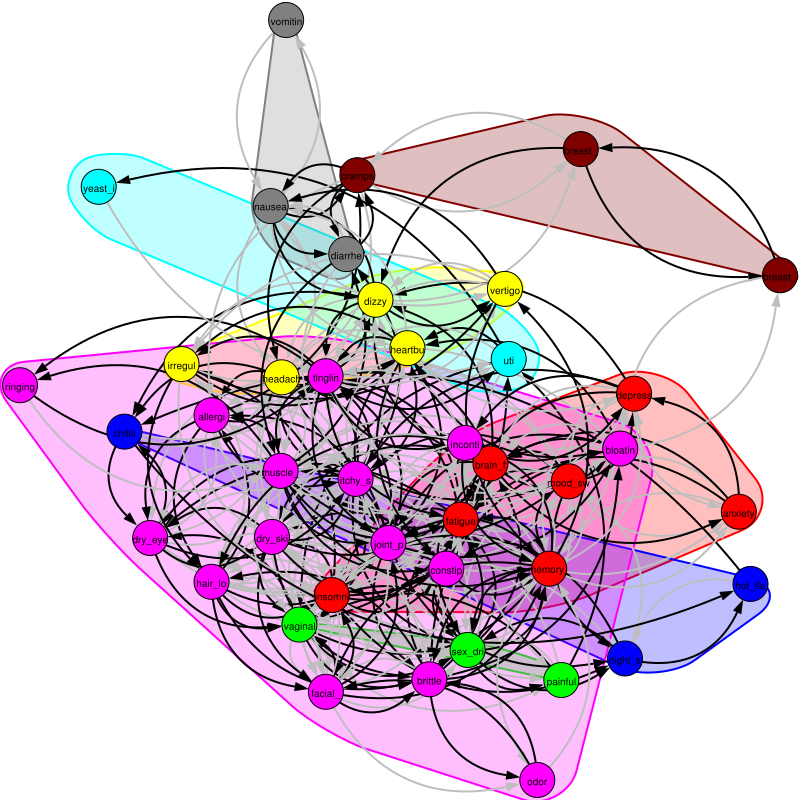

In [120]:
filename = 'graph_weights_menopausetake2_npt.csv'


data = pd.read_csv(filename)
data.head()

data = data.applymap(fixer)

# Creating a graph with vertices named after the symptoms.
g = ig.Graph.Weighted_Adjacency(data.to_numpy())

# Set the vertex names to the symptoms.
g.vs['name'] = data.columns.values

wtrap = g.community_walktrap(weights=g.es["weight"], steps = 4)

clust=wtrap.as_clustering()

print(clust)

nm = shorten(g.vs['name'])

style = {
    'vertex_label' : nm,
    'vertex_label_size': 10,  # Define the text size for vertex labels
    "edge_width": 2, # You can adjust the edge width as well
    "vertex_size":35,
    #"vertex_color":['blue', 'red', 'green', 'yellow'],
    "edge_color":['black', 'grey']
    
}

# Specify the size of the plot by adjusting the bbox parameter
bbox = (0, 0, 800, 800)  # Adjust the coordinates as needed to set the plot size



ig.plot(clust, mark_groups=True, **style, bbox=bbox)


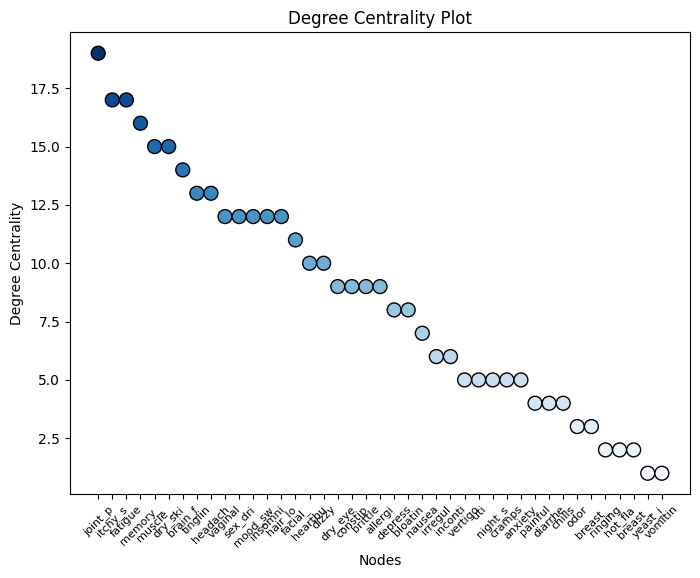

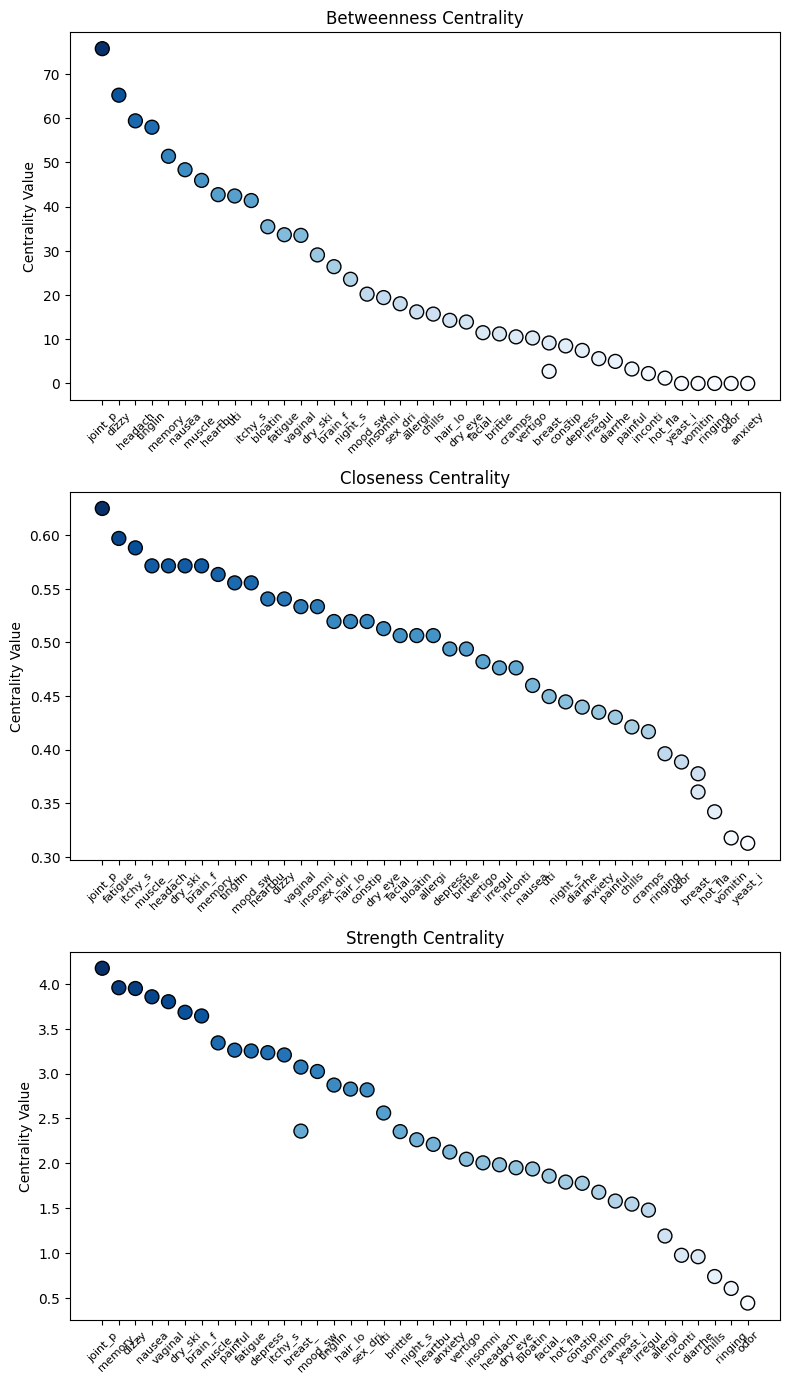

In [123]:
import igraph as ig
import matplotlib.pyplot as plt

# Create a list of node labels (assuming 4 nodes)
node_labels = nm

# Creating a graph with vertices named after the symptoms and labels
G = ig.Graph.Weighted_Adjacency(data.to_numpy(), mode=ig.ADJ_UPPER, attr='weight')
G.vs['label'] = node_labels  # Assign labels to nodes

degree_centrality = G.degree()

# Sort nodes by degree centrality (high to low)
degree_sorted_nodes = [x for _, x in sorted(zip(degree_centrality, node_labels), reverse=True)]
degree_centrality.sort(reverse=True)

# Extract nodes and centrality values
nodes = list(range(len(degree_centrality)))
centrality_values = degree_centrality

# Create a scatter plot for Degree Centrality
plt.figure(figsize=(8, 6))
plt.scatter(nodes, centrality_values, c=centrality_values, cmap='Blues', edgecolors='k', s=100)

plt.title('Degree Centrality Plot')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')

# Set the x-axis label font size and rotation using degree_sorted_nodes
plt.xticks(nodes, degree_sorted_nodes, rotation=45, fontsize=8)  # Assign labels and adjust 'fontsize'

# Calculate Betweenness Centrality
betweenness_centrality = G.betweenness()

# Calculate Closeness Centrality
closeness_centrality = G.closeness()

# Calculate Strength Centrality (assuming weighted graph)
strength_centrality = G.strength(weights='weight')  # 'weight' refers to edge weights

# Sort nodes by centrality for each measure (high to low)
betweenness_sorted_nodes = [x for _, x in sorted(zip(betweenness_centrality, node_labels), reverse=True)]
closeness_sorted_nodes = [x for _, x in sorted(zip(closeness_centrality, node_labels), reverse=True)]
strength_sorted_nodes = [x for _, x in sorted(zip(strength_centrality, node_labels), reverse=True)]

# Sort centrality values accordingly
betweenness_centrality.sort(reverse=True)
closeness_centrality.sort(reverse=True)
strength_centrality.sort(reverse=True)

# Create a figure with larger vertically aligned subplots
plt.figure(figsize=(8, 18))

# Create a scatter plot for Betweenness Centrality
plt.subplot(411)
plt.scatter(betweenness_sorted_nodes, betweenness_centrality, c=betweenness_centrality, cmap='Blues', edgecolors='k', s=100)
plt.title('Betweenness Centrality')
plt.ylabel('Centrality Value')

# Set the x-axis label font size and rotation using betweenness_sorted_nodes
plt.xticks(rotation=45, fontsize=8)

# Create a scatter plot for Closeness Centrality
plt.subplot(412)
plt.scatter(closeness_sorted_nodes, closeness_centrality, c=closeness_centrality, cmap='Blues', edgecolors='k', s=100)
plt.title('Closeness Centrality')
plt.ylabel('Centrality Value')

# Set the x-axis label font size and rotation using closeness_sorted_nodes
plt.xticks(rotation=45, fontsize=8)

# Create a scatter plot for Strength Centrality
plt.subplot(413)
plt.scatter(strength_sorted_nodes, strength_centrality, c=strength_centrality, cmap='Blues', edgecolors='k', s=100)
plt.title('Strength Centrality')
plt.ylabel('Centrality Value')

# Set the x-axis label font size and rotation using strength_sorted_nodes
plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


In [95]:
import igraph as ig
import pandas as pd

# Create a list of node labels (assuming 4 nodes)
node_labels = nm

# Creating a graph with vertices named after the symptoms and labels
G = ig.Graph.Weighted_Adjacency(data.to_numpy(), mode=ig.ADJ_UPPER, attr='weight')
G.vs['label'] = node_labels  # Assign labels to nodes

degree_centrality = G.degree()
betweenness_centrality = G.betweenness()
closeness_centrality = G.closeness()
strength_centrality = G.strength(weights='weight')  # 'weight' refers to edge weights

# Create a DataFrame to store centrality values and node labels
centrality_df = pd.DataFrame({
    'Node Label': node_labels,
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Strength Centrality': strength_centrality
})

# Sort the DataFrame by each centrality measure and get the top five nodes
top_degree_nodes = centrality_df.nlargest(5, 'Degree Centrality')
top_betweenness_nodes = centrality_df.nlargest(5, 'Betweenness Centrality')
top_closeness_nodes = centrality_df.nlargest(5, 'Closeness Centrality')
top_strength_nodes = centrality_df.nlargest(5, 'Strength Centrality')

# Print the top nodes for each centrality measure
print("Top 5 nodes by Degree Centrality:")
print(top_degree_nodes)

print("\nTop 5 nodes by Betweenness Centrality:")
print(top_betweenness_nodes)

print("\nTop 5 nodes by Closeness Centrality:")
print(top_closeness_nodes)

print("\nTop 5 nodes by Strength Centrality:")
print(top_strength_nodes)


Top 5 nodes by Degree Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
14    joint_p                 19               75.688894   
1     fatigue                 17               33.624730   
13    itchy_s                 17               41.351948   
24    memory_                 16               51.361372   
18    dry_ski                 15               29.061182   

    Closeness Centrality  Strength Centrality  
14              0.625000             4.172753  
1               0.597015             3.251091  
13              0.588235             3.206801  
24              0.563380             3.955792  
18              0.571429             3.682198  

Top 5 nodes by Betweenness Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
14    joint_p                 19               75.688894   
23      dizzy                 10               65.171866   
7     headach                 13               59.369589   
31    tinglin                 13     

## Natural Menopause

Clustering with 41 elements and 10 clusters
[ 0] hot_flashes, chills, night_sweats
[ 1] mood_swings, muscle_tension, joint_pain, fatigue, memory_lapse,
     headaches, brain_fog, insomnia, anxiety, ringing_ears,
     tingling_extremeties, depression, odor
[ 2] dizzy, irregular_beat, vertigo
[ 3] vaginal_dryness, sex_drive, painful_intercourse
[ 4] brittle_nails, hair_loss, itchy_skin, facial_hair, dry_skin, dry_eyes
[ 5] allergies
[ 6] uti, yeast_infection
[ 7] nausea, heartburn, constipation, bloating, diarrhea, vomiting
[ 8] breast_pain, cramps, breast_swelling
[ 9] incontinence


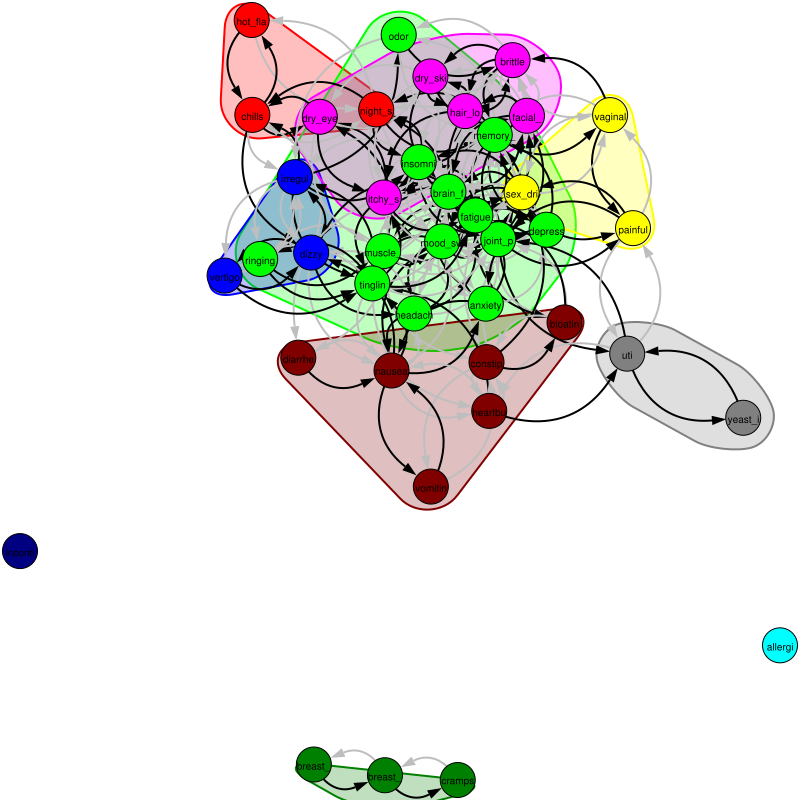

In [114]:
filename = 'graph_weights_menopause_natural_npt.csv'


data = pd.read_csv(filename)
data.head()

data = data.applymap(fixer)

# Creating a graph with vertices named after the symptoms.
g = ig.Graph.Weighted_Adjacency(data.to_numpy())

# Set the vertex names to the symptoms.
g.vs['name'] = data.columns.values

wtrap = g.community_walktrap(weights=g.es["weight"], steps = 4)

clust=wtrap.as_clustering()

print(clust)

nm = shorten(g.vs['name'])

style = {
    'vertex_label' : nm,
    'vertex_label_size': 10,  # Define the text size for vertex labels
    "edge_width": 2, # You can adjust the edge width as well
    "vertex_size":35,
    #"vertex_color":['blue', 'red', 'green', 'yellow'],
    "edge_color":['black', 'grey']
    
}

# Specify the size of the plot by adjusting the bbox parameter
bbox = (0, 0, 800, 800)  # Adjust the coordinates as needed to set the plot size

ig.plot(clust, mark_groups=True, **style, bbox=bbox)

In [115]:
import igraph as ig
import pandas as pd

# Create a list of node labels (assuming 4 nodes)
node_labels = nm

# Creating a graph with vertices named after the symptoms and labels
G = ig.Graph.Weighted_Adjacency(data.to_numpy(), mode=ig.ADJ_UPPER, attr='weight')
G.vs['label'] = node_labels  # Assign labels to nodes

degree_centrality = G.degree()
betweenness_centrality = G.betweenness()
closeness_centrality = G.closeness()
strength_centrality = G.strength(weights='weight')  # 'weight' refers to edge weights

# Create a DataFrame to store centrality values and node labels
centrality_df = pd.DataFrame({
    'Node Label': node_labels,
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Strength Centrality': strength_centrality
})

# Sort the DataFrame by each centrality measure and get the top five nodes
top_degree_nodes = centrality_df.nlargest(5, 'Degree Centrality')
top_betweenness_nodes = centrality_df.nlargest(5, 'Betweenness Centrality')
top_closeness_nodes = centrality_df.nlargest(5, 'Closeness Centrality')
top_strength_nodes = centrality_df.nlargest(5, 'Strength Centrality')

# Print the top nodes for each centrality measure
print("Top 5 nodes by Degree Centrality:")
print(top_degree_nodes)

print("\nTop 5 nodes by Betweenness Centrality:")
print(top_betweenness_nodes)

print("\nTop 5 nodes by Closeness Centrality:")
print(top_closeness_nodes)

print("\nTop 5 nodes by Strength Centrality:")
print(top_strength_nodes)


Top 5 nodes by Degree Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
4     joint_p                 14               94.640250   
5     fatigue                 14               52.478219   
10    brain_f                 14               56.105717   
2     mood_sw                 13               51.663205   
25    tinglin                 11               66.251630   

    Closeness Centrality  Strength Centrality  
4               0.593220             3.752620  
5               0.583333             2.802116  
10              0.593220             3.707001  
2               0.603448             3.189821  
25              0.564516             2.403172  

Top 5 nodes by Betweenness Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
4     joint_p                 14               94.640250   
25    tinglin                 11               66.251630   
10    brain_f                 14               56.105717   
5     fatigue                 14     

## Medical Surgical Menopause

Clustering with 41 elements and 14 clusters
[ 0] mood_swings, anxiety, fatigue, insomnia, brain_fog, memory_lapse,
     depression
[ 1] constipation, itchy_skin, dry_skin, hair_loss, dry_eyes, brittle_nails,
     facial_hair, heartburn
[ 2] uti, yeast_infection
[ 3] joint_pain, muscle_tension, tingling_extremeties
[ 4] painful_intercourse, sex_drive, vaginal_dryness
[ 5] headaches
[ 6] hot_flashes, night_sweats
[ 7] bloating, breast_swelling, breast_pain
[ 8] allergies
[ 9] incontinence
[10] diarrhea, dizzy, nausea, irregular_beat, cramps, vomiting, vertigo
[11] ringing_ears
[12] odor
[13] chills


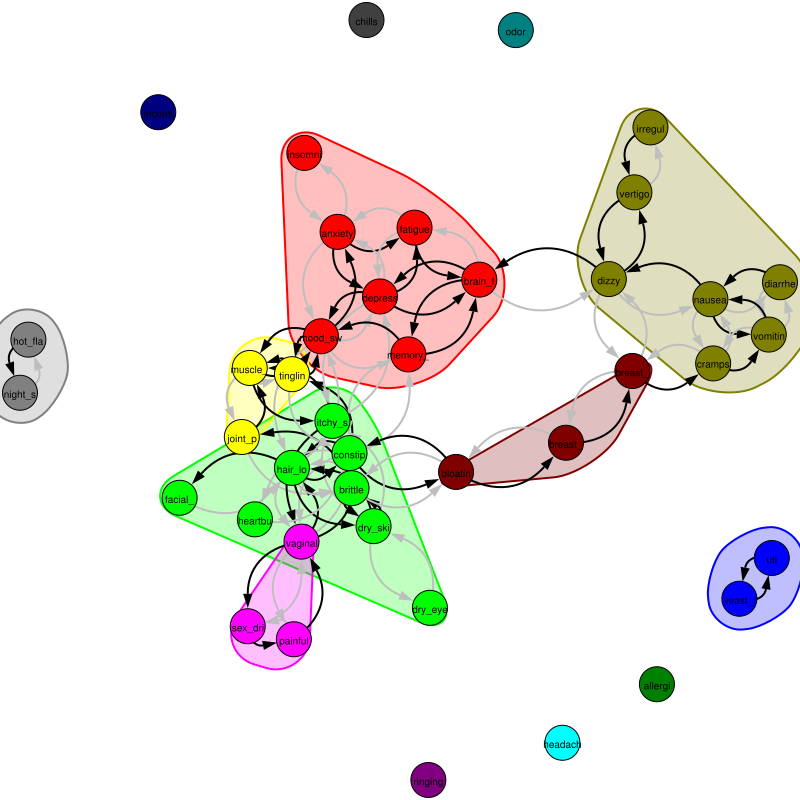

In [116]:
filename = 'graph_weights_menopause_medhyst_npt.csv'


data = pd.read_csv(filename)
data.head()

data = data.applymap(fixer)

# Creating a graph with vertices named after the symptoms.
g = ig.Graph.Weighted_Adjacency(data.to_numpy())

# Set the vertex names to the symptoms.
g.vs['name'] = data.columns.values

wtrap = g.community_walktrap(weights=g.es["weight"], steps = 4)

clust=wtrap.as_clustering()

print(clust)

nm = shorten(g.vs['name'])

style = {
    'vertex_label' : nm,
    'vertex_label_size': 10,  # Define the text size for vertex labels
    "edge_width": 2, # You can adjust the edge width as well
    "vertex_size":35,
    #"vertex_color":['blue', 'red', 'green', 'yellow'],
    "edge_color":['black', 'grey']
    
}

# Specify the size of the plot by adjusting the bbox parameter
bbox = (0, 0, 800, 800)  # Adjust the coordinates as needed to set the plot size

ig.plot(clust, mark_groups=True, **style, bbox=bbox)

In [117]:
import igraph as ig
import pandas as pd

# Create a list of node labels (assuming 4 nodes)
node_labels = nm

# Creating a graph with vertices named after the symptoms and labels
G = ig.Graph.Weighted_Adjacency(data.to_numpy(), mode=ig.ADJ_UPPER, attr='weight')
G.vs['label'] = node_labels  # Assign labels to nodes

degree_centrality = G.degree()
betweenness_centrality = G.betweenness()
closeness_centrality = G.closeness()
strength_centrality = G.strength(weights='weight')  # 'weight' refers to edge weights

# Create a DataFrame to store centrality values and node labels
centrality_df = pd.DataFrame({
    'Node Label': node_labels,
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Strength Centrality': strength_centrality
})

# Sort the DataFrame by each centrality measure and get the top five nodes
top_degree_nodes = centrality_df.nlargest(5, 'Degree Centrality')
top_betweenness_nodes = centrality_df.nlargest(5, 'Betweenness Centrality')
top_closeness_nodes = centrality_df.nlargest(5, 'Closeness Centrality')
top_strength_nodes = centrality_df.nlargest(5, 'Strength Centrality')

# Print the top nodes for each centrality measure
print("Top 5 nodes by Degree Centrality:")
print(top_degree_nodes)

print("\nTop 5 nodes by Betweenness Centrality:")
print(top_betweenness_nodes)

print("\nTop 5 nodes by Closeness Centrality:")
print(top_closeness_nodes)

print("\nTop 5 nodes by Strength Centrality:")
print(top_strength_nodes)


Top 5 nodes by Degree Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
0     mood_sw                  6               69.521429   
1     constip                  6               90.322619   
18    hair_lo                  6               66.785714   
14    vaginal                  5               60.792857   
34    depress                  5               79.350000   

    Closeness Centrality  Strength Centrality  
0               0.375000             1.510876  
1               0.384615             0.984728  
18              0.361446             1.270676  
14              0.340909             2.876835  
34              0.379747             2.561596  

Top 5 nodes by Betweenness Centrality:
   Node Label  Degree Centrality  Betweenness Centrality  \
26      dizzy                  4              134.766667   
17    brain_f                  4              130.609524   
1     constip                  6               90.322619   
34    depress                  5     